In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

LOADING IMAGE

In [43]:
def read_file(filename):
    img=cv2.imread(filename)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

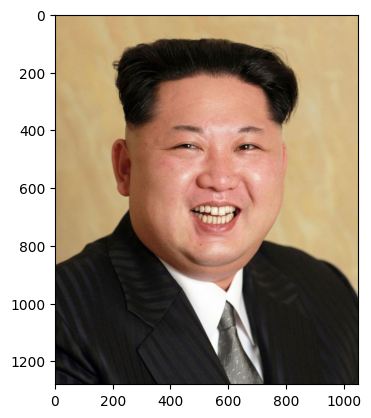

In [44]:
filename="IMG-20221126-WA0005.jpg"
img=read_file(filename)
org_img=np.copy(img)

#CREATE EDGE MASK

In [45]:
def edge_mask(img, line_size, blur_value):
    gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur=cv2.medianBlur(gray,blur_value)
    edges=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,line_size,blur_value )
    return edges

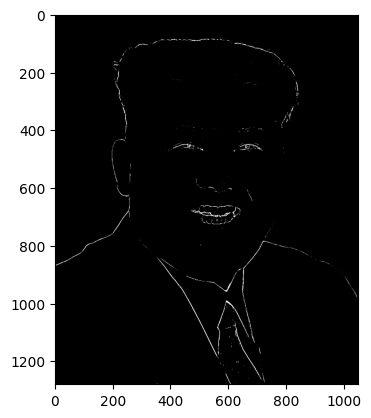

In [46]:
line_size,blur_value=5,7
edges=edge_mask(img,line_size,blur_value)
plt.imshow(edges, cmap="binary")
plt.show()

REDUCE the Color Palette

In [47]:
def color_quantization(img, k):
    data=np.float32(img).reshape((-1,3))
    criteria=(cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
    ret,label,center = cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center=np.uint8(center)
    result=center[label.flatten()]
    result=result.reshape(img.shape)
    return result

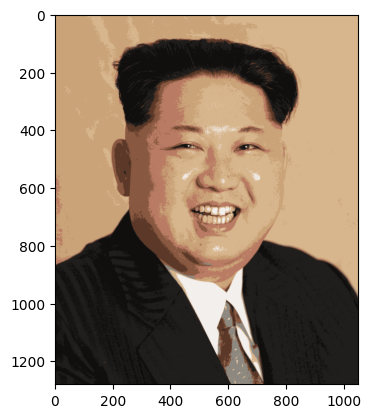

In [48]:
img=color_quantization(img, k=9)

plt.imshow(img)
plt.show()

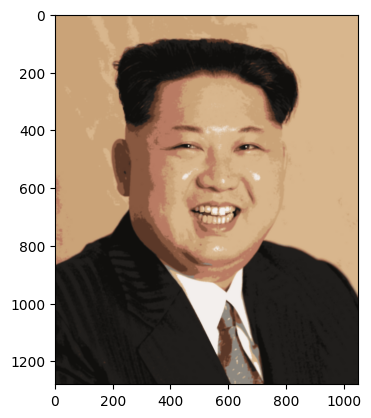

In [49]:
#reduce the noice
blurred=cv2.bilateralFilter(img, d = 7, sigmaColor= 200, sigmaSpace=200)

plt.imshow(blurred)
plt.show()

#combine edge mask with the quantize img 

In [50]:
def cartoon():
    c=cv2.bitwise_and(blurred,blurred,mask=edges)
    plt.imshow(org_img)
    plt.title("org_img")
    plt.show()
    
    plt.imshow(c)
    plt.title("cartoonified Image")
    plt.show()


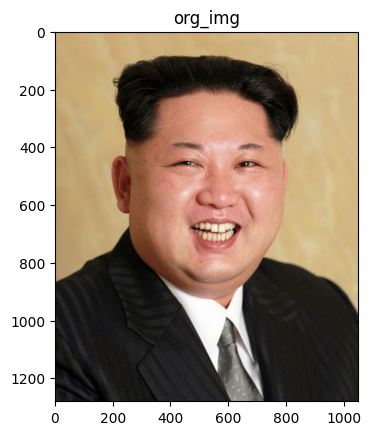

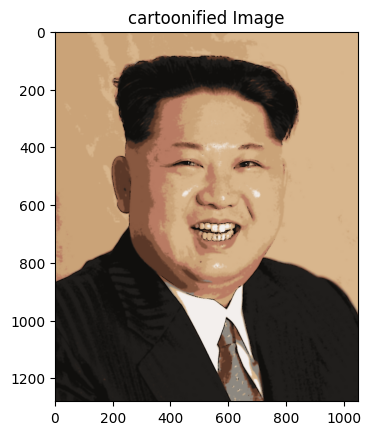

In [51]:
cartoon()